In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### Licitação:


In [12]:
dados_licitacao = pd.read_csv ('./2017/licitacao.csv', sep=',', encoding='UTF-8')
dados_licitacao.head()

C:\Users\Lucas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (52,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,47500,PM DE ESTÂNCIA VELHA,68.0,2017,PRP,16.0,2017.0,G,144,2017.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
1,85900,PM DE TABAÍ,4.0,2017,PRD,NaN,NaN,NaN,05,2017.0,...,J,22148846000106.0,NaN,NaN,NaN,S,NaN,NaN,NaN,N
2,75300,PM DE DERRUBADAS,2.0,2017,PRP,122.0,2016.0,G,3,2017.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
3,53411,INST. DE PREV. E ASSIST. DOS SERV. MUNIC. DE N...,1.0,2017,LEI,30.0,2016.0,G,2016.52.803139PA,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
4,88027,PM DE CAPÃO DO CIPÓ,1.0,2017,PRP,123.0,2017.0,G,1,2017.0,...,NaN,NaN,NaN,NaN,1112500.0,S,NaN,NaN,NaN,N


- Verificação dos nomes das colunas do dataframe

In [13]:
dados_licitacao.columns.values

array(['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO',
       'CD_TIPO_MODALIDADE', 'NR_COMISSAO', 'ANO_COMISSAO', 'TP_COMISSAO',
       'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL',
       'TP_LICITACAO', 'TP_NIVEL_JULGAMENTO', 'DT_AUTORIZACAO_ADESAO',
       'TP_CARACTERISTICA_OBJETO', 'TP_NATUREZA', 'TP_REGIME_EXECUCAO',
       'BL_PERMITE_SUBCONTRATACAO', 'TP_BENEFICIO_MICRO_EPP',
       'TP_FORNECIMENTO', 'TP_ATUACAO_REGISTRO', 'NR_LICITACAO_ORIGINAL',
       'ANO_LICITACAO_ORIGINAL', 'NR_ATA_REGISTRO_PRECO',
       'DT_ATA_REGISTRO_PRECO', 'PC_TAXA_RISCO', 'TP_EXECUCAO',
       'TP_DISPUTA', 'TP_PREQUALIFICACAO', 'BL_INVERSAO_FASES',
       'TP_RESULTADO_GLOBAL', 'CNPJ_ORGAO_GERENCIADOR',
       'NM_ORGAO_GERENCIADOR', 'DS_OBJETO', 'CD_TIPO_FUNDAMENTACAO',
       'NR_ARTIGO', 'DS_INCISO', 'DS_LEI', 'DT_INICIO_INSCR_CRED',
       'DT_FIM_INSCR_CRED', 'DT_INICIO_VIGEN_CRED', 'DT_FIM_VIGEN_CRED',
       'VL_LICITACAO', 'BL_ORCAMENTO_SIGILOSO',
       'BL

- Obter informações sobre cada coluna e seu tipo

In [14]:
dados_licitacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62887 entries, 0 to 62886
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_ORGAO                     62887 non-null  int64  
 1   NM_ORGAO                     62887 non-null  object 
 2   NR_LICITACAO                 62887 non-null  float64
 3   ANO_LICITACAO                62887 non-null  int64  
 4   CD_TIPO_MODALIDADE           62887 non-null  object 
 5   NR_COMISSAO                  41977 non-null  float64
 6   ANO_COMISSAO                 41977 non-null  float64
 7   TP_COMISSAO                  41977 non-null  object 
 8   NR_PROCESSO                  62880 non-null  object 
 9   ANO_PROCESSO                 62880 non-null  float64
 10  TP_OBJETO                    62887 non-null  object 
 11  CD_TIPO_FASE_ATUAL           62887 non-null  object 
 12  TP_LICITACAO                 62887 non-null  object 
 13  TP_NIVEL_JULGAME

- Verificação do tamanho das linhas e colunas

In [15]:
dados_licitacao.shape

(62887, 61)

- Separação das colunas importantes para a criação de um novo dataframe

In [16]:
col_licitacao = ['CD_ORGAO', 'NR_LICITACAO','TP_OBJETO', 'DS_OBJETO']

licitacao_df = dados_licitacao.filter(items = col_licitacao)

- Como recomendado, em relação a coluna *'TP_OBJETO'*, utilizou-se apenas as linhas cujo tipo de objeto = *COM* (compras)

In [17]:
licitacao_df = licitacao_df[(licitacao_df.TP_OBJETO == 'COM')]

objeto = licitacao_df.groupby(by=['DS_OBJETO'])

licitacao_df.head()

,CD_ORGAO,NR_LICITACAO,TP_OBJETO,DS_OBJETO
2,75300,2.0,COM,Aquisição de alimentos.
4,88027,1.0,COM,AQUISIÇÃO DE COMBUSTIVEIS PARA MANUTENÇÃO DA F...
20,72300,1.0,COM,"""AQUISIÇÃO DE PNEU/CÂMARA/ COLARINHO NOVOS PAR..."
24,81000,3.0,COM,Aquisição de óleos lubrificantes
25,42200,1.0,COM,CONTRATAÇÃO DE EMPRESA PARA FORNECIMENTO DE CO...


- Remoção da coluna *'TP_OBJETO'*

In [18]:
licitacao_df.drop(['TP_OBJETO'], axis = 1, inplace = True)

- Verificação detalhada da coluna DS_OBJETO.

*Para melhor processamento, fora criado um dataframe apenas com a coluna em questão e a coluna CD_ORGAO*

In [19]:
verification_df = licitacao_df[['CD_ORGAO','DS_OBJETO']]
ProfileReport(verification_df)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Verificação dos objetos mais vendidos no dataframe de licitação

In [20]:
licitacao_df['DS_OBJETO'].value_counts().head(15)


...                                                                                                                                                                                                                                                                                                                   115
Material                                                                                                                                                                                                                                                                                                               65
Aquisição de medicamentos.                                                                                                                                                                                                                                                                                             43
AQUISIÇÃO DE MEDICAMENTOS                                 

- Verificação da existência de algum dado nulo

In [21]:
licitacao_df.isna().sum()

CD_ORGAO        0
NR_LICITACAO    0
DS_OBJETO       0
dtype: int64

### Itens:

In [22]:
dados_item = pd.read_csv ('./2017/item.csv', sep=',', encoding='UTF-8')
dados_item

C:\Users\Lucas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,77200,18.0,2017,PRP,1,1,1,óleo diesel comum,104755.0,L,...,NaN,757.0,588.0,J,7016855000150,NaN,NaN,T,NaN,NaN
1,77200,18.0,2017,PRP,1,2,2,gasolina comum,25135.0,L,...,NaN,757.0,588.0,J,7016855000150,NaN,NaN,T,NaN,NaN
2,77200,18.0,2017,PRP,1,3,3,óleo diesel S10,31000.0,L,...,NaN,757.0,588.0,J,7016855000150,NaN,NaN,T,NaN,NaN
3,77200,8.0,2017,PRE,1,29,29,Recapagem de Pneu 1000x20 liso,10.0,UN,...,NaN,745.0,632.0,J,3562696000138,NaN,NaN,T,NaN,NaN
4,77200,8.0,2017,PRE,1,30,30,"Recapagem de Pneu 1000x20 borrachudo, profundi...",10.0,UN,...,NaN,745.0,632.0,J,3562696000138,NaN,NaN,T,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902705,78200,17.0,2017,PRE,1,19,19,budesonida 50mcg spray nasal com 60 doses,500.0,UN,...,NaN,NaN,NaN,J,82873068000573,NaN,NaN,T,NaN,NaN
902706,78200,17.0,2017,PRE,1,56,56,medroxiprogesterona (acetato) 150 mg,1500.0,UN,...,NaN,NaN,NaN,J,2520829000140,NaN,NaN,T,NaN,NaN
902707,78200,17.0,2017,PRE,1,20,20,captopril 25mg,750000.0,COM,...,NaN,NaN,NaN,J,2520829000140,NaN,NaN,T,NaN,NaN
902708,78200,17.0,2017,PRE,1,26,26,"ciprofloxacino 500mg comprimido fracionável, e...",20000.0,COM,...,NaN,NaN,NaN,J,2520829000140,NaN,NaN,T,NaN,NaN


- Verificação dos nomes das colunas do dataframe

In [23]:
dados_item.columns.values

array(['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE',
       'NR_LOTE', 'NR_ITEM', 'NR_ITEM_ORIGINAL', 'DS_ITEM', 'QT_ITENS',
       'SG_UNIDADE_MEDIDA', 'VL_UNITARIO_ESTIMADO', 'VL_TOTAL_ESTIMADO',
       'DT_REF_VALOR_ESTIMADO', 'PC_BDI_ESTIMADO',
       'PC_ENCARGOS_SOCIAIS_ESTIMADO', 'CD_FONTE_REFERENCIA',
       'DS_FONTE_REFERENCIA', 'TP_RESULTADO_ITEM',
       'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO',
       'PC_BDI_HOMOLOGADO', 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO',
       'TP_ORCAMENTO', 'CD_TIPO_FAMILIA', 'CD_TIPO_SUBFAMILIA',
       'TP_DOCUMENTO', 'NR_DOCUMENTO', 'TP_DOCUMENTO.1', 'NR_DOCUMENTO.1',
       'TP_BENEFICIO_MICRO_EPP', 'PC_TX_ESTIMADA', 'PC_TX_HOMOLOGADA'],
      dtype=object)

- Separação das colunas importantes para a criação de um novo dataframe

In [24]:
col_item = ['CD_ORGAO', 'NR_LICITACAO', 'DS_ITEM','VL_UNITARIO_HOMOLOGADO']

item_df = dados_item.filter(items = col_item)

In [25]:
item_df

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,77200,18.0,óleo diesel comum,3.2300
1,77200,18.0,gasolina comum,4.2990
2,77200,18.0,óleo diesel S10,3.3390
3,77200,8.0,Recapagem de Pneu 1000x20 liso,543.0000
4,77200,8.0,"Recapagem de Pneu 1000x20 borrachudo, profundi...",583.0000
...,...,...,...,...
902705,78200,17.0,budesonida 50mcg spray nasal com 60 doses,10.4000
902706,78200,17.0,medroxiprogesterona (acetato) 150 mg,13.2600
902707,78200,17.0,captopril 25mg,0.0130
902708,78200,17.0,"ciprofloxacino 500mg comprimido fracionável, e...",0.4000


- Verificação dos itens mais vendidos 

In [26]:
item_df['DS_ITEM'].value_counts()

MANGUEIRA SILICONE 2.1/2"                                                    1669
MATERIAL                                                                     1417
.                                                                             951
SERVIÇO                                                                       561
CENOURA                                                                       324
                                                                             ... 
TINTA PARA TECIDO 35ML SÉPIA                                                    1
AMORTECEDOR TRASEIRO MICRO ISZ-8217                                             1
PASTA D`AGUA                                                                    1
carrinho para pastas suspensas, com rodinhas. Capacidade mínima 25 pastas       1
DIÁRIA DE LIMPEZA                                                               1
Name: DS_ITEM, Length: 672060, dtype: int64

#### Merge dos dois dataframes:

- *"Fusão" dos dataframes de Licitação e Itens a partir das colunas que ambos têm em comum*

In [28]:
new_df = pd.merge(item_df, licitacao_df, on= ['CD_ORGAO', 'NR_LICITACAO'], how= 'inner')

- Excluir linhas duplicadas

In [29]:
new_df = new_df.drop_duplicates()
new_df

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
0,77200,18.0,óleo diesel comum,3.230,"Compra de combustíveis para os veículos, máqui..."
1,77200,18.0,gasolina comum,4.299,"Compra de combustíveis para os veículos, máqui..."
2,77200,18.0,óleo diesel S10,3.339,"Compra de combustíveis para os veículos, máqui..."
3,77200,8.0,Recapagem de Pneu 1000x20 liso,543.000,Registro de preços de pneus e serviços de reca...
4,77200,8.0,"Recapagem de Pneu 1000x20 borrachudo, profundi...",583.000,Registro de preços de pneus e serviços de reca...
...,...,...,...,...,...
1039531,83700,30.0,GASOLINA COMUN,3.360,REGISTRO DE PREÇOS PARA AQUISIÇÃO DE COMBUSTÍV...
1039532,88370,821.0,PAO D'AGUA TIPO CACETINHO 050 G**,0.400,AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0796-ALIMEN...
1039533,46500,93.0,Roçadeira Agricola RDMR 160,6200.000,COMPRA DE ROÇADEIRAS AGRÍCOLAS PARA A SMAPIC
1039534,46500,70.0,Picape Cabine Dupla/compacto,136000.000,COMPRA DE VEICULO PICAPE - EMENDA PARLAMENTAR ...


#### **Quais são os principais bens materiais comprados pelos órgãos públicos do RS?**

- Abaixo constam os 50 itens mais vendidos:

In [30]:
itens_mais_comprados = new_df['DS_ITEM'].value_counts().head(10)
new_df['DS_ITEM'].value_counts().head(50)


MATERIAL                     2054
MANGUEIRA SILICONE 2.1/2"    1419
.                             523
CENOURA                       471
BETERRABA                     468
SERVIÇO                       457
GASOLINA COMUM                381
CEBOLA                        366
Cebola                        357
ALFACE                        354
ALHO                          344
TOMATE                        340
Cenoura                       328
REPOLHO                       327
Beterraba                     292
Tomate                        259
BATATA DOCE                   247
LARANJA                       245
CHUCHU                        243
PRODUTOS                      243
Alface                        240
Brócolis                      237
BATATA INGLESA                236
Alho                          235
Cfe edital                    224
OVOS                          218
FILTRO DE AR                  216
Batata doce                   211
Chuchu                        205
TEMPERO VERDE 

- *Boxplot* para representar a distribuição e valores discrepantes (outliers) dos dados por meio de quartis dos itens mais comprados:


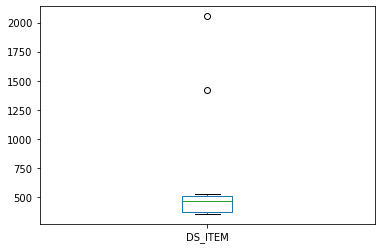

In [31]:
itens_mais_comprados.plot.box()
plt.show()

- Abaixo, observa-se o gráfico dos 10 itens mais comprados, com destaque aos 2 mais comprados de 2017

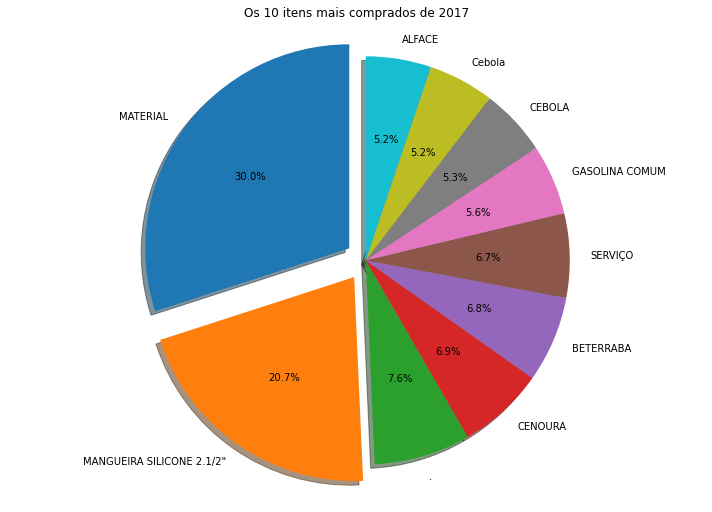

In [33]:
fig = plt.figure(figsize =(10, 7)) 
# o atributo explode indica que fatia do gráfico será destacada. No exemplo abaixo, serão a primeira e segunda fatia. A quantidade de valores é igual ao número de fatias do gráfico. 
explode = (0.1, 0.1, 0, 0, 0, 0, 0,0,0,0)


plt.pie(itens_mais_comprados, labels=itens_mais_comprados.index,autopct='%1.1f%%',explode=explode, shadow=True, startangle=90) 
#Centraliza o gráfico
plt.axis('equal')
#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.title('Os 10 itens mais comprados de 2017')
plt.show() 

- Validação do item mais vendido 

In [34]:
new_df[new_df['DS_ITEM']=='MATERIAL']

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
263001,88031,31.0,MATERIAL,2.55,compra de materiais de construção para realiza...
263002,88031,31.0,MATERIAL,2.55,Aquisição de utensílios para a cozinha da Esco...
263003,88031,31.0,MATERIAL,49.00,compra de materiais de construção para realiza...
263004,88031,31.0,MATERIAL,49.00,Aquisição de utensílios para a cozinha da Esco...
263011,88031,31.0,MATERIAL,2004.50,compra de materiais de construção para realiza...
...,...,...,...,...,...
1033387,65400,58.0,MATERIAL,NaN,AQUISICAO DE MATERIAIS E MAO DE OBRA PARA MANU...
1034630,88031,58.0,MATERIAL,NaN,Aquisição de uma colhedora de forragens
1034631,88031,46.0,MATERIAL,NaN,aquisição e instalação de equipamentos de sono...
1034648,88031,57.0,MATERIAL,NaN,Registro de Preços visando eventual e futura a...


- Numero de linhas sem valor para o item mais comprado

In [35]:
print(f"Número de itens sem valor: {new_df[new_df['DS_ITEM']=='MATERIAL']['VL_UNITARIO_HOMOLOGADO'].isna().sum()}")

Número de itens sem valor: 40


- Criação de um dataframe de Itens X Valor unitário homologado:

In [36]:
itens_comprados = new_df[['DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']]
itens_comprados.head()

,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,óleo diesel comum,3.230
1,gasolina comum,4.299
2,óleo diesel S10,3.339
3,Recapagem de Pneu 1000x20 liso,543.000
4,"Recapagem de Pneu 1000x20 borrachudo, profundi...",583.000


- Verificação dos itens comprados com o valor zerado

In [37]:
itens_comprados.isna().sum()

DS_ITEM                        0
VL_UNITARIO_HOMOLOGADO    153944
dtype: int64

*Nota-se que há 153944 itens com valor zerado*

- Agrupamento dos itens 

In [38]:
valores_itens = itens_comprados.groupby(by=['DS_ITEM']).sum()
valores_itens

,VL_UNITARIO_HOMOLOGADO
DS_ITEM,
\t ??? ?? ???? ?? ????? ?? ??? ?? ???????? ???? ? ?????,176.00
"\t Contratação de empresa(s) especializada(s) para fornecimento de 10 (dez) fragmentadoras de papel, visando atender necessidades do Tribunal de Justiça Militar do Estado do Rio Grande do Sul - TJM/RS",1705.70
"\t Tapete entrada do TJM 1.94 x 92,50",453.12
\t Tapete para frente banheiro feminino térreo 1.60 x 0.60,240.33
"\t04 (quatro) unidades de aparelhos de telefone celular, dual chip, android 5.1, 4 G, processador Quad Core, Memória Interna de 8 G, Câmara frontal de 2 megapixels e Câmera trazeira de 5 megapixels, Tela 4.5 polegadas e touchscreen, leitor multimídia, rádio, videoconferência e Bluetooth, cenectividade WIFI e GPS.Garantia de no mínimo 12 meses.",519.99
...,...
"“““ “““ Monitor Multiparâmetros Tipo um, Pressão Não invasiva (PNI); respiraç ão, temperatura; bateria; monitor LCD, tela de 10” a 12”, eletrocardiograma(ECG); oximetria(SPO2)",6667.99
"•\tContratação de empresa especializada em serviços de assistência técnica para manutenção corretiva em equipamentos de informática (micro computadores, servidores, notebooks, impressoras a jato de tinta, matriciais e a laser e correlatos, DVR sistema de vigilância, No-break, estabilizadores) e na rede de computadores, incluindo revisão geral, limpeza e substituição de componentes, em equipamentos pertencentes ao acervo patrimonial desta Municipalidade (Não inclui as peças para reposição) e atualização de sistemas, os serviços serão prestados para todas as secretarias exceto escolas municipais. O tempo estabelecido de espera para o atendimento do chamado não poderá ultrapassar 60 minutos, a quantidade de tempo estabelecido de técnicos para assistência técnica em cada mês será de no máximo 40 (quarenta) horas, em todas as visitas será feito um relatório técnico para o controle das horas de serviços prestados.",0.00
"•\tUm veículo automotor, zero km; •\tSedan quatro portas; •\tCor Branca; •\tAno e Modelo no mínimo 2017; •\tMotor no mínimo 1.4; •\tBicombustível – Gasolina – Álcool; •\tPotencia no mínimo 96 CV; •\tMotor quatro cilindros; •\tMotor 8 válvulas; •\tTransmissão mecânica manual; •\tCinco marchas sincronizadas à frente e um à ré; •\tCapacidade de carga quatro passageiros + Motorista; •\tEquipado com quatro pneus radiais 185/65 R14, com calota nas quatro rodas e estepe no mesmo tamanho; •\tLimpador com temporizador e lavador elétrico do para-brisa; •\tApoio de cabeceira para todos os bancos dianteiros e traseiros; •\tTrava elétrica automática nas quatro portas ao rodar o veículo; •\tDesembaçador do vidro traseiro; •\tVidro elétrico nas 02 (duas) portas dianteiras; •\tBarra de proteção nas portas; •\tRetrovisores externos c/comando interno mecânico; •\tRodas de aço 5.5 estampado aro 14; •\tAr condicionado, quente e frio; •\tDireção hidráulica; •\tAir Bag – duplo frontal; •\tFreios dianteiros a disco ventilado ABS com EBD e traseiro a tambor; •\tBrake Light; •\tAlarme antifurto; •\tTapetes para motorista e passageiros; •\tProtetor no motor; •\tCapacidade do tanque combustível mínimo 47 litros; •\tPorta malas mínimo 480 litros; •\tExtintor de incêndio, chaves de roda, triângulo e demais itens de segurança obrigatório;",50000.00


- Os 30 itens com maior valor de compra:

In [39]:
itens_mais_vendidos_valor = valores_itens.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(10)
valores_itens.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(30)

,VL_UNITARIO_HOMOLOGADO
DS_ITEM,
"Contratação dos serviços de coleta urbana, rural e transporte de resíduos sólidos domésticos do Município de Pelotas, até o destino final. Coleta conteinerizada e transporte de resíduos sólidos domésticos, no perímetro urbano da cidade de Pelotas, até o destino final. Execução dos serviços de coleta seletiva e transporte de resíduos recicláveis até o local indicado pelo Sanep. Execução dos serviços de coleta urbana, rural e tratamento de resíduos de serviços de saúde (RSS), produzidos pelos postos de saúde e estabelecimentos geradores de RSS gerenciados pelo Município de Pelotas e, após, sua respectiva disposição final",1.434842e+08
Execução da Estação de Tratamento de Esgoto Novo Mundo,3.356061e+07
SERVIÇO,2.898121e+07
CONTRATAÇÃO DE EMPRESA ESPECIALIZADA,2.043898e+07
"Seleção de empresa do ramo da construção civil interessada na produção de 105 Unidades Habitacionais de interesse social, no âmbito do Programa Minha Casa Minha Vida - PAC2.",1.890000e+07
"Execução de serviços e obra de revestimento do canal paralelo da Rua Curitiba no trecho compreendido entre as ruas São Paulo e a Casa de Bombas 07 e trecho compreendido entre as ruas Jaguarão e Soledade, conforme os anexos do edital, no Município de Canoas/RS",1.639101e+07
"a seleção de melhor proposta para a implantação de empreendimento turístico em área de terras com 15.774,70m² e uma edificação parcialmente executada com área considerada de 3.107m², não averbada, (descrita no laudo de avaliação em anexo ao presente edital) a ser doada, com reserva de reversão, pelo Município, na forma estabelecida na Lei Municipal n.º 2.952/2017, de 12 de junho de 2017.",1.500300e+07
"Coleta manual e transporte dos resíduos sólidos urbanos até a estação de transbordo da central de triagem do bairro Roselândia. * 5.000 TONELADAS/MÊS - Valor unitário: RS 148,2435. - Valor mensal: R$ 741.217,6196. - Valor global 12 meses: R$ 8.894.611,4352.",1.332792e+07
Serviço de manutenção e conservação do aterro controlado Colina do Sol,1.276800e+07


- Validação do item com maior valor de compra:

In [40]:
new_df[new_df['DS_ITEM']=='Contratação dos serviços de coleta urbana, rural e transporte de resíduos sólidos domésticos do Município de Pelotas, até o destino final. Coleta conteinerizada e transporte de resíduos sólidos domésticos, no perímetro urbano da cidade de Pelotas, até o destino final. Execução dos serviços de coleta seletiva e transporte de resíduos recicláveis até o local indicado pelo Sanep. Execução dos serviços de coleta urbana, rural e tratamento de resíduos de serviços de saúde (RSS), produzidos pelos postos de saúde e estabelecimentos geradores de RSS gerenciados pelo Município de Pelotas e, após, sua respectiva disposição final']

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
707584,54405,2.0,"Contratação dos serviços de coleta urbana, rur...",71742116.84,Material de higiene e limpeza
707585,54405,2.0,"Contratação dos serviços de coleta urbana, rur...",71742116.84,Aquisição de Notebook


- OBS: Observou-se que, o item mais comprado não é o item que possui maior valor de compra unitária, logo, deixo então, um dataframe com os itens mais vendidos (assim como solicitado), bem como um dataframe com os itens agrupados de maior valor unitário homologado que consta acima.

- Gráfico dos itens mais comprados por valor:

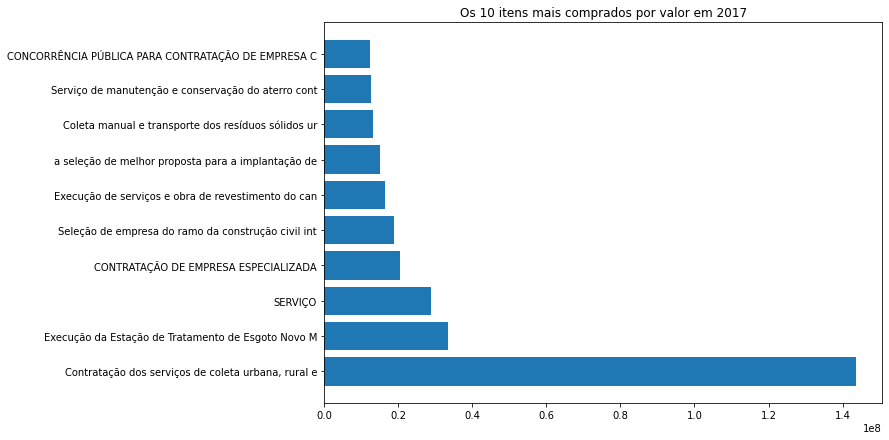

In [45]:
fig = plt.figure(figsize =(10, 7)) 
item_descricao = []
for i in itens_mais_vendidos_valor.index:
    item_descricao.append(i[0:50])

plt.barh(item_descricao,itens_mais_vendidos_valor['VL_UNITARIO_HOMOLOGADO'])
plt.title('Os 10 itens mais comprados por valor em 2017')
plt.show() 

- Agrupamento por Orgão

In [46]:
compras_por_orgao = new_df.groupby(by=['CD_ORGAO']).sum()
compras_por_orgao.drop(['NR_LICITACAO'], axis=1,inplace=True)
mais_comprados_por_orgao = compras_por_orgao.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(10)
mais_comprados_por_orgao

,VL_UNITARIO_HOMOLOGADO
CD_ORGAO,
54405,1.909275e+08
53400,6.816884e+07
54900,3.566607e+07
72900,3.315486e+07
61300,2.795457e+07
60000,2.426895e+07
55600,2.399933e+07
44500,2.202215e+07
58200,2.107636e+07


- Gráfico contendo os códigos dos 10 órgãos que mais compraram (por valor):

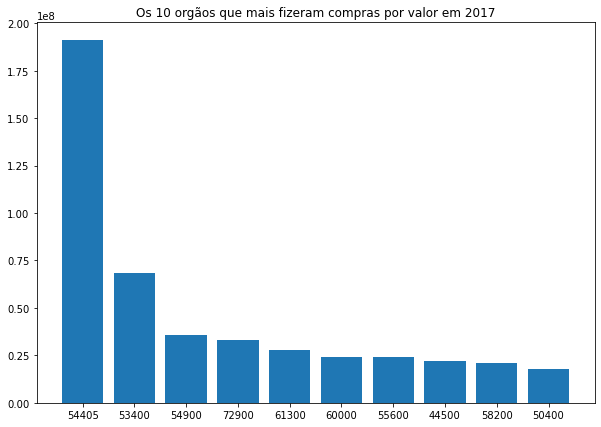

In [47]:
fig = plt.figure(figsize =(10, 7)) 
item_descricao = []
for i in mais_comprados_por_orgao.index:
    item_descricao.append(f'{i}')

plt.bar(item_descricao,mais_comprados_por_orgao['VL_UNITARIO_HOMOLOGADO'])
plt.title('Os 10 orgãos que mais fizeram compras por valor em 2017')
plt.show() 